# About this notebook

This notebook calculates a spectrum for a single photon energy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Multiprocessing
import multiprocessing as mp
from multiprocessing import Pool

# For the progress bar
from ipywidgets import IntProgress
from IPython.display import display

# This package
import XNLdyn

import warnings
warnings.filterwarnings("default")
%matplotlib notebook

In [2]:

pulse_energy_max = 15e-8 # Joule

N_local_fluences_to_calculate = 20
N_pulse_energies = 10

Nsteps_r = 100

pulse_profile_sigma= 400 # nm rms



## Set up the problem and modify the parameters a little
PAR = XNLdyn.XNLpars()
PAR.N_photens = 1
PAR.t0_i       = [0,]   # Arrival time on time-axis / fs
PAR.tdur_sig_i = [10,]  # Rms pulse duration / fs
PAR.E_i_abs    = [848.588888888889,] # Photon Energies of incident pulses / eV
PAR.lambda_res_Ei = (58.593287278409086,)
PAR.lambda_nonres = (150,)

PAR.I0_i =  [XNLdyn.photons_per_J(PAR.E_i_abs[0])*pulse_energy_max]

#* XNLdyn.photons_per_J(PAR.E_i_abs[0])

PAR.Nsteps_z = 10



In [3]:
pulse_energy_max_photons = pulse_energy_max *  XNLdyn.photons_per_J(PAR.E_i_abs[0])
pulse_energy_max_photons/PAR.atomic_density

12070835.42120716

Starting to generate lookup tables for T between 296.0 to 1000295.0 and Ef between -31.6 and 31.6
Lookup tables generated.
Saving at ./fermi_lookup_table.npz


<IPython.core.display.Javascript object>


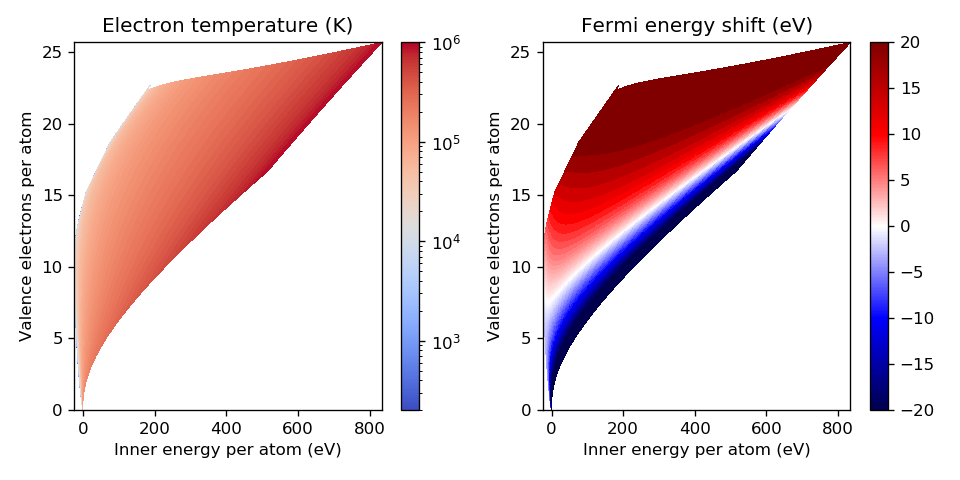

<IPython.core.display.Javascript object>


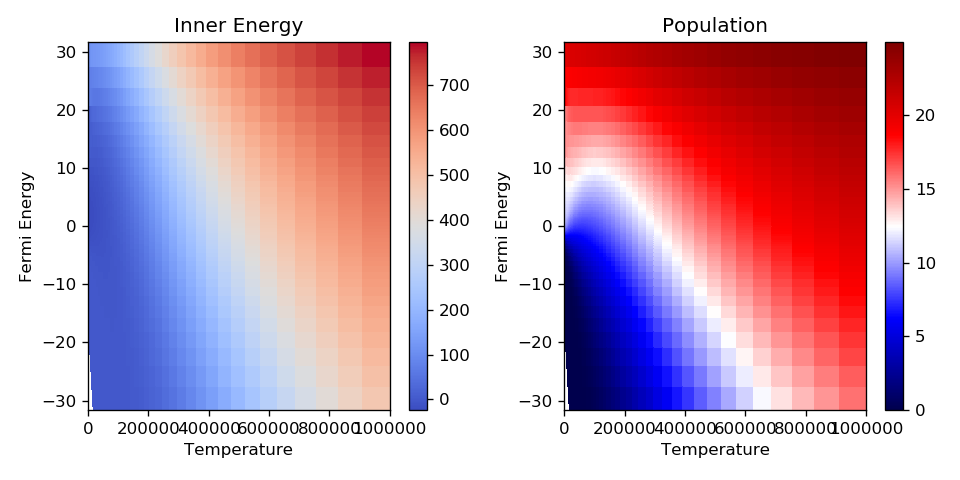

In [4]:
sim = XNLdyn.XNLsim(PAR, DEBUG=True, load_tables = False)
PAR.FermiSolver.plot_lookup_tables()

<IPython.core.display.Javascript object>


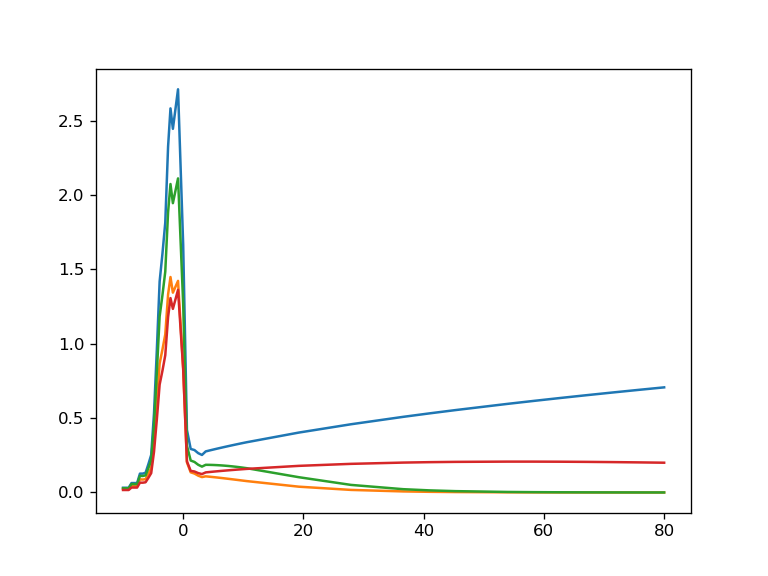

In [5]:
plt.figure()
plt.plot(PAR.E_j,PAR.m_j/PAR.enax_dE_j)
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e5,0)*PAR.m_j/PAR.enax_dE_j)
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e5,10)*PAR.m_j/PAR.enax_dE_j)
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e6,0)*PAR.m_j/PAR.enax_dE_j)

## Run a simulation for a single Fluence

In [6]:
%%time
fluences_joules_nm2, dA = XNLdyn.calculate_fluences(Nsteps_r, pulse_energy_max, pulse_profile_sigma) 
# These are just to get an idea where to calculate Fluences

fluences_simulated = np.logspace(np.log10(np.min(fluences_joules_nm2)),
                                 np.log10(np.max(fluences_joules_nm2)),
                                 N_local_fluences_to_calculate)


CPU times: user 272 µs, sys: 0 ns, total: 272 µs
Wall time: 249 µs


Simulating for  1.2874087823339324 photons per atom
Initializing a simulation where ['I0_i'] are changed to [6894.623054202759]

Starting to generate lookup tables for T between 296.0 to 1000295.0 and Ef between -31.6 and 31.6
Lookup tables generated.
Saving at ./fermi_lookup_table.npz
t:  -30.0
-23.732344481164095 10.0 -> 472.57904644192536 -7.052314288102934e-11
Photons impinging per atom this timestep:  [0.03343099]
Deviation from electron conservation:  0.0
Deviation from energy conservation (%):  nan
t:  -29.99783253908477
-23.7323433347279 9.999999516930917 -> 422.69031970886533 -5.7038251455310274e-08


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:411: UserWarning: U: -23.732344481164095 out of bounds of lookup table! (R: 10.0)
  warnings.warn(f'U: {U_is} out of bounds of lookup table! (R: {R_is})')


Photons impinging per atom this timestep:  [0.03345273]
Deviation from electron conservation:  0.0
Deviation from energy conservation (%):  nan
t:  -29.998776437555687
-23.732343833984594 9.999999727300647 -> 582.97981066075 -2.1181688403260068e-07
Photons impinging per atom this timestep:  [0.03344326]
Deviation from electron conservation:  0.0
Deviation from energy conservation (%):  nan
t:  -29.998164656333532
-23.732343508384105 9.999999590875907 -> 602.5235389347285 -3.2811462702397876e-07
Photons impinging per atom this timestep:  [0.0334494]
Deviation from electron conservation:  -7.279189390466644e-23
Deviation from energy conservation (%):  0.0
t:  -29.995105750222752
-23.732341310437018 9.999998908668752 -> 662.763766684579 -9.385839785380767e-07
Photons impinging per atom this timestep:  [0.03348011]
Deviation from electron conservation:  -7.940933880509066e-23
Deviation from energy conservation (%):  -1.7474947863541218e-08
t:  -29.994561944691945
-23.732339982306165 9.9999

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.787e-06 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


Photons impinging per atom this timestep:  [0.03363715]
Deviation from electron conservation:  1.9058241313221758e-21
Deviation from energy conservation (%):  0.0
t:  -29.976170692413838
-23.732326399761615 9.99999467640308 -> 768.4129113905117 -4.437186817085603e-06
Photons impinging per atom this timestep:  [0.03367074]
Deviation from electron conservation:  4.235164736271502e-22
Deviation from energy conservation (%):  8.142104251421744e-10
t:  -29.95952422174497
-23.732306946931974 9.999990942397302 -> 826.1959435822832 -8.106673796248742e-06
Photons impinging per atom this timestep:  [0.03383913]
Deviation from electron conservation:  4.658681209898652e-21
Deviation from energy conservation (%):  4.738818953824608e-10
t:  -29.956564849181618
-23.732302889942396 9.999990277291307 -> 836.0748825036725 -8.978986668850553e-06
Photons impinging per atom this timestep:  [0.03386914]
Deviation from electron conservation:  -6.352747104407253e-22
Deviation from energy conservation (%):  8.

Photons impinging per atom this timestep:  [0.03692198]
Deviation from electron conservation:  -1.6940658945086007e-21
Deviation from energy conservation (%):  5.5265849039082444e-11
t:  -29.649576561982833
-23.73090450078274 9.999919066748504 -> 819.3008934467995 -0.00024194844944602778
Photons impinging per atom this timestep:  [0.03711408]
Deviation from electron conservation:  3.3881317890172014e-20
Deviation from energy conservation (%):  0.0
t:  -29.562092348861043
-23.730124592744883 9.999897940940622 -> 1182.5623411124056 -0.0002427821214059378
Photons impinging per atom this timestep:  [0.0380879]
Deviation from electron conservation:  4.404571325722362e-20
Deviation from energy conservation (%):  4.152948722305572e-11
t:  -29.54653959986161
-23.729901655190634 9.999894148679116 -> 666.8775758911844 -0.0002415253489349567
Photons impinging per atom this timestep:  [0.03826338]
Deviation from electron conservation:  8.470329472543003e-21
Deviation from energy conservation (%): 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.484e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.340e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 6.261e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.550e-05 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.228e-03 under minimum of -1e-05.Valence occupatio

Deviation from electron conservation:  3.0191498890480247e-10
Deviation from energy conservation (%):  8.842723858890733e-11
t:  -29.58755357209751
-23.730385055596912 9.999904127576038 -> 1341.5511208937571 2.4502325839392824e-05
Photons impinging per atom this timestep:  [0.03780218]
Deviation from electron conservation:  5.251604272976662e-20
Deviation from energy conservation (%):  4.42128829313467e-11
t:  -29.68441981895158
-23.731159284489426 9.999927383458122 -> 1248.4918856810827 -1.2954893833239112e-05
Photons impinging per atom this timestep:  [0.03673241]
Deviation from electron conservation:  -3.3881317890172014e-21
Deviation from energy conservation (%):  5.839677428069101e-11
t:  -29.675596183499415
-23.73109258746302 9.999925277336756 -> 1257.505170891713 -1.1236626439981023e-05
Photons impinging per atom this timestep:  [0.03682873]
Deviation from electron conservation:  1.8634724839594607e-20
Deviation from energy conservation (%):  5.6748052879857126e-11
t:  -29.63147

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.676e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.450e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 2.388e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -4.596e-06 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [0.03832545]
Deviation from electron conservation:  2.710505431213761e-20
Deviation from energy conservation (%):  3.9535865554126745e-11
t:  -29.541053355011083
-23.729948159665675 9.999892800505481 -> 1383.6234855916225 0.00010106853085467549
Photons impinging per atom this timestep:  [0.03832545]
Deviation from electron conservation:  4.0657581468206416e-20
Deviation from energy conservation (%):  0.0
t:  -29.602529982835964
-23.730504572006286 9.999907755679905 -> 1330.3264226509398 4.1301164815266134e-05
Photons impinging per atom this timestep:  [0.037635]
Deviation from electron conservation:  6.776263578034403e-20
Deviation from energy conservation (%):  0.0
t:  -29.596879606586814
-23.730452751987674 9.999906386183227 -> 1334.7556606557607 4.4513878270535656e-05


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.313e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 2.247e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -4.236e-06 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [0.03769799]
Deviation from electron conservation:  0.0
Deviation from energy conservation (%):  4.5281030676225984e-11
t:  -29.56862772534107
-23.730190869747855 9.99989953067232 -> 1361.6705400346546 7.322938178511151e-05
Photons impinging per atom this timestep:  [0.03801438]
Deviation from electron conservation:  0.0
Deviation from energy conservation (%):  4.2187419514893166e-11
t:  -29.56360516867516
-23.73014357629777 9.999898307828996 -> 1364.9882924838655 8.854315838036086e-05
Photons impinging per atom this timestep:  [0.03807087]
Deviation from electron conservation:  1.0164395367051604e-20
Deviation from energy conservation (%):  4.1679489936109495e-11
t:  -29.557326972842773
-23.73008189416833 9.999896777284507 -> 1373.3695919450897 9.73238708503743e-05
Photons impinging per atom this timestep:  [0.03814159]
Deviation from electron conservation:  8.131516293641283e-20
Deviation from energy conservation (%):  4.106072973056675e-11


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.083e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


Photons impinging per atom this timestep:  [0.03985169]
Deviation from electron conservation:  2.371692252312041e-20
Deviation from energy conservation (%):  9.074052330600204e-11
t:  -29.487930695690057
-23.729344651593387 9.999879729598362 -> 1193.0392186225517 -0.0002917316167518891
Photons impinging per atom this timestep:  [0.03893108]
Deviation from electron conservation:  3.7269449679189215e-20
Deviation from energy conservation (%):  7.046897128885779e-11
t:  -29.48148443835944
-23.72927560106834 9.999878128778471 -> 1335.1778448525297 -0.0002914612808933015
Photons impinging per atom this timestep:  [0.03900515]
Deviation from electron conservation:  3.5575383784680614e-20
Deviation from energy conservation (%):  3.4771187621924196e-11
t:  -29.449253151706365
-23.728827072886126 9.999870113872893 -> 1453.7043637279405 -0.00029121482901928175
Photons impinging per atom this timestep:  [0.03937735]
Deviation from electron conservation:  1.3552527156068805e-20
Deviation from ener

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:675: UserWarning: Correcting a significant non-zero sum in thermalization
  warnings.warn('Correcting a significant non-zero sum in thermalization')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.572e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 4.118e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.160e-05 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:867: UserWarning: Negative state density!
  warnings.warn('Negative state 

Photons impinging per atom this timestep:  [0.04117727]
Deviation from electron conservation:  9.43407789327853e-10
Deviation from energy conservation (%):  2.5146774812969046e-11
t:  -29.297088558372476
-23.726773346288823 9.999831532190465 -> 1590.1992694565347 0.0006797173455765915
Photons impinging per atom this timestep:  [0.04117727]
Deviation from electron conservation:  5.421010862427522e-20
Deviation from energy conservation (%):  5.029308528835425e-11
t:  -29.389120699639193
-23.728111255958748 9.99985502389046 -> 1517.714350468151 0.00041677522673921885
Photons impinging per atom this timestep:  [0.04008015]
Deviation from electron conservation:  6.437450399132683e-20
Deviation from energy conservation (%):  0.0
t:  -29.37988661222225
-23.727980541900795 9.999852679235179 -> 1526.178113010318 0.00043765959197017423
Photons impinging per atom this timestep:  [0.04018905]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.981e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 3.862e-04 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.476e-04 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Deviation from electron conservation:  -3.7269449679189215e-20
Deviation from energy conservation (%):  0.0
t:  -29.333716175137535
-23.72731483355825 9.999840933122837 -> 1561.3827873114994 0.0005618037396644127
Photons impinging per atom this timestep:  [0.04073749]
Deviation from electron conservation:  1.6940658945086007e-20
Deviation from energy conservation (%):  2.6633901469727664e-11
t:  -29.325508097433588
-23.727187747091573 9.999838833508456 -> 1567.517701763248 0.0005936699366539955
Photons impinging per atom this timestep:  [0.04083568]
Deviation from electron conservation:  5.759824041329242e-20
Deviation from energy conservation (%):  0.0
t:  -29.31524800030365
-23.72703221392854 9.999836202956697 -> 1576.8638473493818 0.0006530266552200459
Photons impinging per atom this timestep:  [0.04095871]
Deviation from electron conservation:  2.0328790734103208e-20
Deviation from energy conservation (%):  2.5864157855425306e-11
t:  -29.31524800030365
-23.72703761166093 9.99983620

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.980e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 4.006e-04 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -4.235e-05 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.705e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 3.341e-04 over maximum of 1.00001.Valence occupation in p

Photons impinging per atom this timestep:  [0.04278622]
Deviation from electron conservation:  1.2874900798265365e-19
Deviation from energy conservation (%):  2.089422756263192e-11
t:  -29.224896101587234
-23.72555845690662 9.99981279266831 -> 605.3753934762838 0.0009979279117686701
Photons impinging per atom this timestep:  [0.04205636]
Deviation from electron conservation:  1.3552527156068805e-20
Deviation from energy conservation (%):  2.2627606894682807e-11
t:  -29.218988733990635
-23.725501640503854 9.999811242259883 -> 1649.4038033443935 0.0009844492703692254
Photons impinging per atom this timestep:  [0.04212902]
Deviation from electron conservation:  3.3881317890172014e-20
Deviation from energy conservation (%):  0.0
t:  -29.189451896007643
-23.72412102297602 9.999803480472476 -> 1377.0138506472435 0.0009907248340361718
Photons impinging per atom this timestep:  [0.042494]
Deviation from electron conservation:  3.049318610115481e-20
Deviation from energy conservation (%):  2.15

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -6.643e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 5.819e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -7.734e-06 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.111e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 4.401e-05 over maximum of 1.00001.Valence occupation in p

Photons impinging per atom this timestep:  [0.04337175]
Deviation from electron conservation:  -3.3881317890172014e-20
Deviation from energy conservation (%):  1.9687423209178756e-11
t:  -29.108142113973607
-23.7234470906138 9.999781861959757 -> 1732.8662293348593 0.001541566351686896
Photons impinging per atom this timestep:  [0.04351317]
Deviation from electron conservation:  -4.743384504624082e-20
Deviation from energy conservation (%):  3.883441632968129e-11
t:  -29.10255137264432
-23.723331954983284 9.999780357779281 -> 1734.656845303699 0.0015641571597591053
Photons impinging per atom this timestep:  [0.04358403]
Deviation from electron conservation:  5.082197683525802e-20
Deviation from energy conservation (%):  1.928415226206478e-11
t:  -29.074597665997906
-23.722756933151214 9.999772827849114 -> 1756.5902962897376 0.0017173183577536832
Photons impinging per atom this timestep:  [0.04393987]
Deviation from electron conservation:  4.0657581468206416e-20
Deviation from energy con

Photons impinging per atom this timestep:  [0.0702092]
Deviation from electron conservation:  -1.8973538018496328e-19
Deviation from energy conservation (%):  0.0
t:  -27.215338487143367
-23.635629691847264 9.99915320550473 -> 3172.9072814604365 0.047729842418661406
Photons impinging per atom this timestep:  [0.07415148]
Deviation from electron conservation:  -1.0842021724855044e-19
Deviation from energy conservation (%):  4.999000401114072e-12
t:  -27.115338487143365
-23.627034648235938 9.999109967448838 -> 3271.767927364239 0.053049783411641016
Photons impinging per atom this timestep:  [0.07619344]
Deviation from electron conservation:  1.6263032587282567e-19
Deviation from energy conservation (%):  4.75601182186884e-12
t:  -26.615338487143365
-23.580713836486733 9.998889011773528 -> 3763.9775779526362 0.08458876779028301
Photons impinging per atom this timestep:  [0.0871475]
Deviation from electron conservation:  -1.6263032587282567e-19
Deviation from energy conservation (%):  3.80

t:  -21.615338487143365
-22.275476076348905 9.99468008649821 -> 12504.7926695104 0.9548706511457841
Photons impinging per atom this timestep:  [0.29101331]
Deviation from electron conservation:  2.2768245622195593e-18
Deviation from energy conservation (%):  7.815286682096926e-13
t:  -21.526449598254477
-22.23080103210126 9.994564521891485 -> 12735.63542369003 0.9797706290395034
Photons impinging per atom this timestep:  [0.29664707]
Deviation from electron conservation:  1.0842021724855044e-18
Deviation from energy conservation (%):  7.644440219572186e-13
t:  -21.415338487143366
-22.174163796414852 9.994413313964428 -> 13020.613112245863 1.0097258559618236
Photons impinging per atom this timestep:  [0.30380914]
Deviation from electron conservation:  1.5178830414797062e-18
Deviation from energy conservation (%):  7.429832676476236e-13
t:  -21.415338487143366
-22.17497607077789 9.994409154446755 -> 13016.284912477442 1.009332478259493
Photons impinging per atom this timestep:  [0.303809

Photons impinging per atom this timestep:  [0.75682793]
Deviation from electron conservation:  6.938893903907228e-18
Deviation from energy conservation (%):  0.0
t:  -16.526449598254477
-17.471361617210697 9.984114657875958 -> 29871.34941279185 2.5199529497330637
Photons impinging per atom this timestep:  [0.76805828]
Deviation from electron conservation:  3.469446951953614e-18
Deviation from energy conservation (%):  0.0
t:  -16.415338487143366
-17.298090470682947 9.983779808703062 -> 30368.25039019396 2.554563660013315
Photons impinging per atom this timestep:  [0.78224392]
Deviation from electron conservation:  5.204170427930421e-18
Deviation from energy conservation (%):  3.634915916232689e-13
t:  -16.415338487143366
-17.304110035640797 9.983787564722082 -> 30352.47214225514 2.5533845432374793
Photons impinging per atom this timestep:  [0.78224392]
Deviation from electron conservation:  1.0842021724855044e-17
Deviation from energy conservation (%):  1.210917677848353e-13
t:  -16.21

-4.4414830199914395 9.962478462389992 -> 60878.03947263212 3.922415742785075
Photons impinging per atom this timestep:  [1.56859176]
Deviation from electron conservation:  9.540979117872439e-18
Deviation from energy conservation (%):  1.2750902953334669e-14
t:  -11.415338487143366
-4.45917503323635 9.962501559778532 -> 60843.0611426112 3.9212839819895535
Photons impinging per atom this timestep:  [1.56859176]
Deviation from electron conservation:  1.1275702593849246e-17
Deviation from energy conservation (%):  1.912064770770249e-14
t:  -11.215338487143367
-3.705578302418349 9.961383890626797 -> 62356.530814751684 3.9561456117718805
Photons impinging per atom this timestep:  [1.60449478]
Deviation from electron conservation:  -9.540979117872439e-18
Deviation from energy conservation (%):  6.188213501673879e-15
t:  -11.115338487143365
-3.3035526077938338 9.960800411368115 -> 63154.90847099293 3.972871685158726
Photons impinging per atom this timestep:  [1.62250989]
Deviation from electro

Photons impinging per atom this timestep:  [2.44965004]
Deviation from electron conservation:  5.0306980803327406e-17
Deviation from energy conservation (%):  1.0784548352078655e-13
t:  -6.415338487143366
22.358861161798956 9.928091482207396 -> 105975.38968326851 3.868004745438075
Photons impinging per atom this timestep:  [2.44965004]
Deviation from electron conservation:  1.734723475976807e-18
Deviation from energy conservation (%):  1.0783707349833915e-13
t:  -6.215338487143366
23.78134491617843 9.926496619928061 -> 108063.2559844937 3.8175656421634834
Photons impinging per atom this timestep:  [2.48078701]
Deviation from electron conservation:  1.3877787807814457e-17
Deviation from energy conservation (%):  5.28039027949401e-14
t:  -6.115338487143366
24.526273571541445 9.92568595019714 -> 109147.82209195658 3.790173098086317
Photons impinging per atom this timestep:  [2.49612915]
Deviation from electron conservation:  2.6020852139652106e-17
Deviation from energy conservation (%):  

Photons impinging per atom this timestep:  [2.97937069]
Deviation from electron conservation:  -3.8163916471489756e-17
Deviation from energy conservation (%):  0.0
t:  -1.4153384871433659
67.25957195667837 9.886752943783074 -> 167603.774730349 1.0872196363199809
Photons impinging per atom this timestep:  [2.97937069]
Deviation from electron conservation:  -3.469446951953614e-18
Deviation from energy conservation (%):  2.8282684096846066e-13
t:  -1.215338487143366
69.41660922214696 9.885150705015445 -> 170516.01432219564 0.9007540536417036
Photons impinging per atom this timestep:  [2.98721877]
Deviation from electron conservation:  1.3877787807814457e-17
Deviation from energy conservation (%):  0.0
t:  -1.1153384871433658
70.5252710137729 9.884365577275915 -> 172018.6715226147 0.8024667481463279
Photons impinging per atom this timestep:  [2.99070192]
Deviation from electron conservation:  -1.734723475976807e-17
Deviation from energy conservation (%):  1.387870009404352e-13
t:  -0.61533

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.073e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.550e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.697e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.128e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


 [3.00422271]
Deviation from electron conservation:  1.1449174941446927e-16
Deviation from energy conservation (%):  1.2648705409582334e-13
t:  0.5846615128566341
91.34558326064753 9.871590337687552 -> 200803.125944631 -1.2544586954437236
Photons impinging per atom this timestep:  [3.00422271]
Deviation from electron conservation:  -3.469446951953614e-18
Deviation from energy conservation (%):  1.2650942440079636e-13
t:  0.7732321626715528
93.61086041864367 9.870257603457466 -> 204035.83002933426 -1.5056607305988718
Photons impinging per atom this timestep:  [3.00037888]
Deviation from electron conservation:  6.938893903907228e-17
Deviation from energy conservation (%):  0.0
t:  0.8675174875790121
94.76559061296625 9.869620293201418 -> 205696.47267758186 -1.6365927886391063
Photons impinging per atom this timestep:  [2.99805901]
Deviation from electron conservation:  2.0816681711721685e-17
Deviation from energy conservation (%):  1.2485227942612844e-13
t:  1.3389441121163088
100.560053

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.020e-02 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -6.192e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [2.58302429]
Deviation from electron conservation:  2.7755575615628914e-17
Deviation from energy conservation (%):  2.193544630219379e-13
t:  5.5275147619312275
152.51788669333948 9.846054269419723 -> 270960.2070033241 -4.452958509942655
Photons impinging per atom this timestep:  [2.58302429]
Deviation from electron conservation:  2.0816681711721685e-17
Deviation from energy conservation (%):  2.1938262791145482e-13
t:  4.694824269530274


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.523e-02 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -4.666e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


144.5038435111751 9.84914452933005 -> 286106.0622262865 -8.848105263430718
Photons impinging per atom this timestep:  [2.69533133]
Deviation from electron conservation:  -7.979727989493313e-17
Deviation from energy conservation (%):  0.0
t:  4.7784790233297985
145.64696884945232 9.848850990993109 -> 246837.55471007913 -0.9543984596408218
Photons impinging per atom this timestep:  [2.68467239]
Deviation from electron conservation:  5.204170427930421e-17
Deviation from energy conservation (%):  2.2157312740874565e-13
t:  5.196752792327416
129.13952060387575 9.847416207739835 -> 259137.34430711175 -6.286001768620039
Photons impinging per atom this timestep:  [2.62924522]
Deviation from electron conservation:  -1.3877787807814457e-17
Deviation from energy conservation (%):  2.2023000249268864e-13
t:  5.271112573482548
90.95693471166196 9.848117628065793 -> 200718.85220856516 -1.3158119344480728
Photons impinging per atom this timestep:  [2.61903224]
Deviation from electron conservation:  6

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -9.700e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.970e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [2.60611913]
Deviation from electron conservation:  9.71445146547012e-17
Deviation from energy conservation (%):  2.1976707157070662e-13
t:  5.364062299926463
150.85997239942552 9.846640817214722 -> 326517.2009711673 -15.701673627676753
Photons impinging per atom this timestep:  [2.60611913]
Deviation from electron conservation:  -1.0755285551056204e-16
Deviation from energy conservation (%):  0.0
t:  4.668110674324311
144.1410718614317 9.849247444248055 -> 285432.78407452645 -8.781909001954828


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.353e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.636e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [2.69870419]
Deviation from electron conservation:  1.1796119636642288e-16
Deviation from energy conservation (%):  0.0
t:  4.738408630520852
145.10070107980675 9.848996909009117 -> 287215.3039551308 -8.957117185914711
Photons impinging per atom this timestep:  [2.68979621]
Deviation from electron conservation:  4.5102810375396984e-17
Deviation from energy conservation (%):  2.217161111447998e-13
t:  5.08989841150356
149.89935335466583 9.847767356768994 -> 326517.2009711673 -15.701673627676753
Photons impinging per atom this timestep:  [2.64373499]
Deviation from electron conservation:  1.0408340855860843e-17
Deviation from energy conservation (%):  2.2054675567187123e-13
t:  5.152385483678263
150.2068801859703 9.847560913013359 -> 326517.2009711673 -15.701673627676753
Photons impinging per atom this timestep:  [2.63528842]
Deviation from electron conservation:  4.85722573273506e-17
Deviation from energy conservation (%):  0.0
t:  5.2304943238

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.071e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -6.286e-04 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [2.52362776]
Deviation from electron conservation:  3.469446951953614e-17
Deviation from energy conservation (%):  0.0
t:  5.933473885862059
158.850327463386 9.845056799460668 -> 270960.2070033241 -3.3653251182505572
Photons impinging per atom this timestep:  [2.52362776]
Deviation from electron conservation:  9.71445146547012e-17
Deviation from energy conservation (%):  4.3714382248764274e-13
t:  5.355226912353018
152.96115610089743 9.846887322363482 -> 270960.2070033241 -4.452958509942655
Photons impinging per atom this timestep:  [2.60735354]
Deviation from electron conservation:  1.5612511283791264e-16
Deviation from energy conservation (%):  0.0
t:  5.417593206581206
153.43149496141825 9.846683567843575 -> 270960.2070033241 -4.452958509942655
Photons impinging per atom this timestep:  [2.59860934]
Deviation from electron conservation:  4.163336342344337e-17
Deviation from energy conservation (%):  0.0
t:  5.729424677722142
155.76858991382

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -4.041e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.233e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [2.4470215]
Deviation from electron conservation:  4.163336342344337e-17
Deviation from energy conservation (%):  2.1792017921520347e-13
t:  6.432051681248414
161.81575251752182 9.843611062267364 -> 326517.2009711673 -13.650078065460137


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.607e-04 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.038e-04 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [2.4470215]
Deviation from electron conservation:  2.7755575615628914e-17
Deviation from energy conservation (%):  2.1792679798829582e-13
t:  6.539652031560975
163.41224106848787 9.843294883886108 -> 297443.1104684012 -7.796360130405237
Photons impinging per atom this timestep:  [2.43000368]
Deviation from electron conservation:  -1.3877787807814457e-17
Deviation from energy conservation (%):  2.178293815695972e-13
t:  6.593452206717256
163.5506584513622 9.843152133317702 -> 297443.1104684012 -7.796360130405237
Photons impinging per atom this timestep:  [2.42143407]
Deviation from electron conservation:  1.0061396160665481e-16
Deviation from energy conservation (%):  2.1780037543960412e-13
t:  6.862453082498659
168.65333926113726 9.842400301985489 -> 297443.1104684012 -6.777680324401113
Photons impinging per atom this timestep:  [2.37800453]
Deviation from electron conservation:  1.0408340855860843e-16
Deviation from energy conservation (%):  

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -9.129e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.795e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [2.36037331]
Deviation from electron conservation:  -1.3877787807814457e-17
Deviation from energy conservation (%):  0.0
t:  6.970053432811221
166.08719691423536 9.842156781616522 -> 270960.2070033241 -2.211029792905104


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.096e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.557e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [2.36037331]
Deviation from electron conservation:  -4.5102810375396984e-17
Deviation from energy conservation (%):  2.1766017944067575e-13
t:  6.527152509793917
163.22678309055667 9.843331613121165 -> 297443.1104684012 -7.796360130405237
Photons impinging per atom this timestep:  [2.43198894]
Deviation from electron conservation:  7.979727989493313e-17
Deviation from energy conservation (%):  0.0
t:  6.574702924066669
163.3559866709471 9.843203872814874 -> 297443.1104684012 -7.796360130405237
Photons impinging per atom this timestep:  [2.42442509]
Deviation from electron conservation:  9.020562075079397e-17
Deviation from energy conservation (%):  0.0
t:  6.8124549954304285
167.85598207738613 9.842537388493062 -> 297443.1104684012 -6.777680324401113
Photons impinging per atom this timestep:  [2.38614788]
Deviation from electron conservation:  -1.457167719820518e-16
Deviation from energy conservation (%):  0.0
t:  6.854722030339541
173.3258621

Photons impinging per atom this timestep:  [2.00261231]
Deviation from electron conservation:  4.163336342344337e-17
Deviation from energy conservation (%):  0.0
t:  9.075479874999258
191.89993137633047 9.839067885365687 -> 431948.36925959005 -27.490914630828378
Photons impinging per atom this timestep:  [1.99352881]
Deviation from electron conservation:  1.5265566588595902e-16
Deviation from energy conservation (%):  2.2078132567435523e-13
t:  9.326637822129197
195.15258218410767 9.838930721279565 -> 326517.2009711673 -7.796360130405237
Photons impinging per atom this timestep:  [1.9479882]
Deviation from electron conservation:  8.673617379884035e-17
Deviation from energy conservation (%):  0.0
t:  9.371288123841184
196.26313317466412 9.83884539616016 -> 297443.1104684012 -2.211029792905104
Photons impinging per atom this timestep:  [1.93987359]
Deviation from electron conservation:  5.898059818321144e-17
Deviation from energy conservation (%):  2.2173573807974553e-13
t:  9.4271010009

217.8932405290203 9.840267255084827 -> 326517.2009711673 -3.8711307293912984
Photons impinging per atom this timestep:  [1.46545258]
Deviation from electron conservation:  7.979727989493313e-17
Deviation from energy conservation (%):  2.36086973562237e-13
t:  12.338838217642008
209.63496567841008 9.84075544630433 -> 431948.36925959005 -23.89892566231053
Photons impinging per atom this timestep:  [1.40564092]
Deviation from electron conservation:  2.42861286636753e-17
Deviation from energy conservation (%):  4.775041349429755e-13
t:  12.399722310467157
190.48551674069083 9.84099333060187 -> 431948.36925959005 -27.490914630828378
Photons impinging per atom this timestep:  [1.39509491]
Deviation from electron conservation:  -5.551115123125783e-17
Deviation from energy conservation (%):  2.392410590818876e-13
t:  12.475827426498594
193.50184764995336 9.841240107271618 -> 358436.01001254556 -13.650078065460137
Photons impinging per atom this timestep:  [1.38195155]
Deviation from electron c

Photons impinging per atom this timestep:  [0.90259191]
Deviation from electron conservation:  1.0408340855860843e-16
Deviation from energy conservation (%):  2.7343655604633346e-13
t:  15.896372129355843
231.56637477957682 9.848410945676866 -> 326517.2009711673 -1.922134543989911
Photons impinging per atom this timestep:  [0.85065791]
Deviation from electron conservation:  -5.551115123125783e-17
Deviation from energy conservation (%):  2.7885528468168235e-13
t:  15.963442214410763
231.56431803608885 9.848586288168438 -> 326517.2009711673 -1.922134543989911
Photons impinging per atom this timestep:  [0.84161769]
Deviation from electron conservation:  -1.3877787807814457e-17
Deviation from energy conservation (%):  1.1194433964277485e-12
t:  16.047279820729415
231.58794781526444 9.848797658974222 -> 326517.2009711673 -1.922134543989911
Photons impinging per atom this timestep:  [0.83039986]
Deviation from electron conservation:  3.469446951953614e-17
Deviation from energy conservation (

246.654762714476 9.861181270749048 -> 393477.87557057705 -10.316051783820818
Photons impinging per atom this timestep:  [0.41140446]
Deviation from electron conservation:  2.42861286636753e-17
Deviation from energy conservation (%):  3.5859831846969305e-13
t:  20.033836126994192
247.51575609656334 9.861524153371029 -> 393477.87557057705 -10.316051783820818
Photons impinging per atom this timestep:  [0.40452371]
Deviation from electron conservation:  1.0755285551056204e-16
Deviation from energy conservation (%):  0.0
t:  20.033836126994192
246.42462035805556 9.861553880822225 -> 393477.87557057705 -10.316051783820818
Photons impinging per atom this timestep:  [0.40452371]
Deviation from electron conservation:  -1.0408340855860843e-17
Deviation from energy conservation (%):  3.607348261788885e-13
t:  20.191961894614984
246.59198109804484 9.862203952717328 -> 393477.87557057705 -10.316051783820818
Photons impinging per atom this timestep:  [0.3918608]
Deviation from electron conservation:

247.29272965704817 9.88164146155663 -> 393477.87557057705 -10.316051783820818
Photons impinging per atom this timestep:  [0.14729112]
Deviation from electron conservation:  -4.163336342344337e-17
Deviation from energy conservation (%):  1.0276053520400958e-12
t:  24.675606831450573
247.25341228484757 9.882164711793049 -> 393477.87557057705 -10.316051783820818


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -6.493e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.986e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.220e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.675e-04 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [0.14331649]
Deviation from electron conservation:  6.765421556309548e-17
Deviation from energy conservation (%):  0.0
t:  24.675606831450573
247.22596508767407 9.882176316690893 -> 393477.87557057705 -10.316051783820818
Photons impinging per atom this timestep:  [0.14331649]
Deviation from electron conservation:  4.336808689942018e-17
Deviation from energy conservation (%):  0.0
t:  24.875606831450572
247.15448639307536 9.883118227969598 -> 393477.87557057705 -10.316051783820818
Photons impinging per atom this timestep:  [0.13638806]
Deviation from electron conservation:  -1.1275702593849246e-16
Deviation from energy conservation (%):  0.0
t:  24.975606831450573
247.11401998471845 9.88359323738656 -> 393477.87557057705 -10.316051783820818
Photons impinging per atom this timestep:  [0.13303052]
Deviation from electron conservation:  1.9081958235744878e-17
Deviation from energy conservation (%):  1.0639991358417905e-12
t:  25.475606831450573
24

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -6.245e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.910e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.650e-03 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.727e-03 under minimum of -1e-05.valence occupation deviation in proc_nonres_inter()
  warnings.warn(string)


Photons impinging per atom this timestep:  [0.08611323]
Deviation from electron conservation:  7.806255641895632e-17
Deviation from energy conservation (%):  0.0
t:  26.660158512008014
246.37733433465598 9.89166834294302 -> 393477.87557057705 -10.316051783820818
Photons impinging per atom this timestep:  [0.08611323]
Deviation from electron conservation:  -2.949029909160572e-17
Deviation from energy conservation (%):  1.2323522334035324e-12
t:  26.850865321265303
246.28762432177703 9.892591821136708 -> 393477.87557057705 -10.316051783820818
Photons impinging per atom this timestep:  [0.08182955]
Deviation from electron conservation:  5.724587470723463e-17
Deviation from energy conservation (%):  0.0
t:  26.94621872589395
246.24191412571798 9.893055494997977 -> 393477.87557057705 -10.316051783820818
Photons impinging per atom this timestep:  [0.07975742]
Deviation from electron conservation:  1.196959198423997e-16
Deviation from energy conservation (%):  0.0
t:  27.422985749037174
246.0

Photons impinging per atom this timestep:  [1.22369073]
Photons impinging per atom this timestep:  [1.39239441]
Photons impinging per atom this timestep:  [1.56859176]
Photons impinging per atom this timestep:  [1.7495028]
Photons impinging per atom this timestep:  [1.93186338]
Photons impinging per atom this timestep:  [2.11200642]
Photons impinging per atom this timestep:  [2.28597308]
Photons impinging per atom this timestep:  [2.44965004]
Photons impinging per atom this timestep:  [2.59892672]
Photons impinging per atom this timestep:  [2.72986442]
Photons impinging per atom this timestep:  [2.83886785]
Photons impinging per atom this timestep:  [2.92284868]
Photons impinging per atom this timestep:  [2.97937069]
Photons impinging per atom this timestep:  [3.00676721]
Photons impinging per atom this timestep:  [3.00422271]
Photons impinging per atom this timestep:  [2.97445702]
Photons impinging per atom this timestep:  [2.91475673]
Photons impinging per atom this timestep:  [2.827

<IPython.core.display.Javascript object>


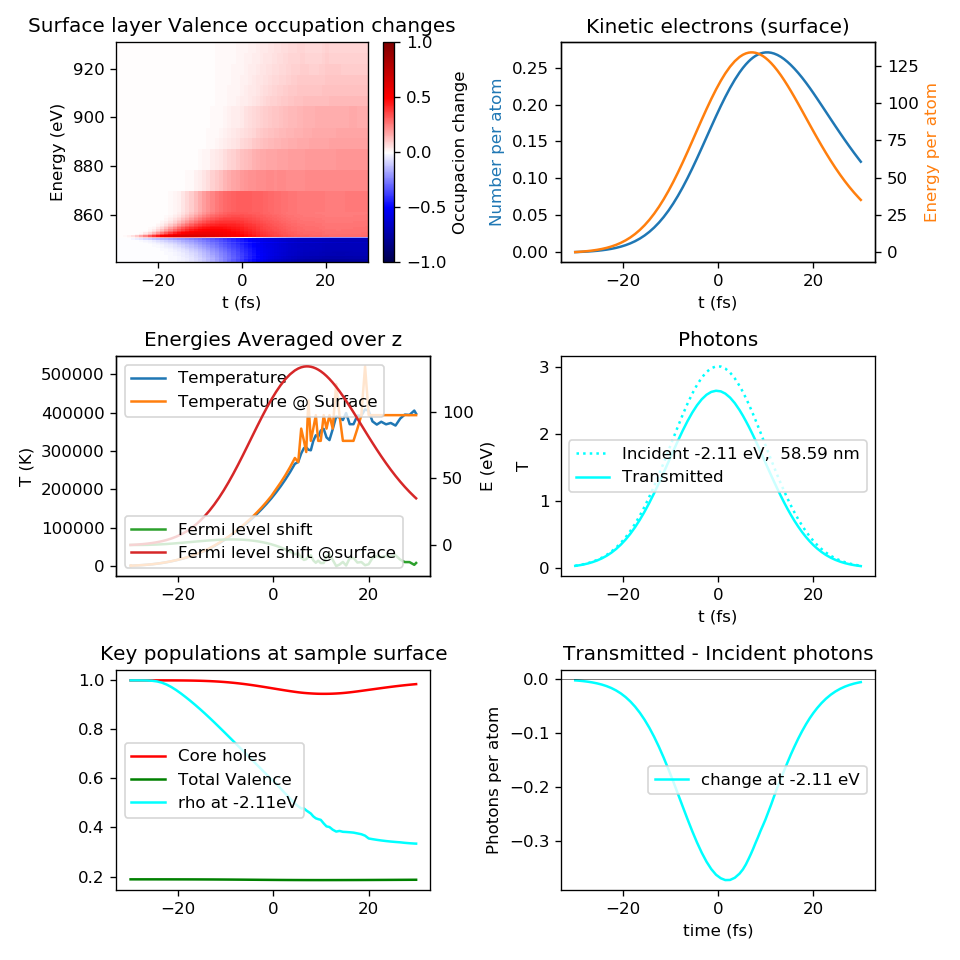

Transmission:  [88.01363838]  %
CPU times: user 1min 35s, sys: 2.26 s, total: 1min 37s
Wall time: 1min 35s


(array([75.22683892]), array([66.20987797]))

In [7]:
%%time

print('Simulating for ', 1.0*np.max(fluences_joules_nm2)* XNLdyn.photons_per_J(PAR.E_i_abs[0])/(PAR.atomic_density*PAR.lambda_res_Ei[0]) ,'photons per atom')

XNLdyn.run_modified_simulation(PAR, dict(t_span=[-30, 30],method='RK45', rtol=1e-3, atol=1e-8, plot = True),
                               ['I0_i',] , [1.0*np.max(fluences_joules_nm2)* XNLdyn.photons_per_J(PAR.E_i_abs[0]),], debug = True)

# Load a spectrum to simulate

<IPython.core.display.Javascript object>


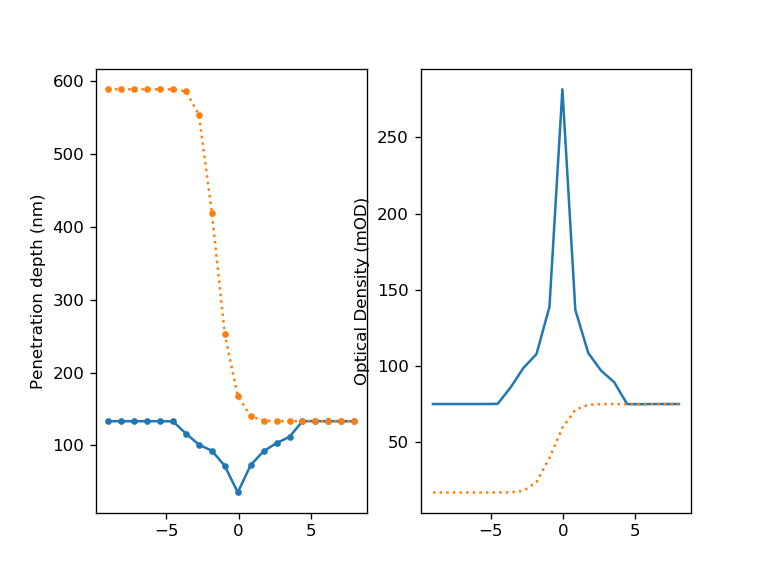

Text(0, 0.5, 'Optical Density (mOD)')

In [8]:
N_points_E = 20# 23
E_fermi = 850.7
Erange = 6
E_min, E_max = E_fermi-1.5*Erange, E_fermi+Erange
enax_abs = np.linspace(E_min, E_max+2, N_points_E) # Absolute energy axis to sample
enax_rel = enax_abs-E_fermi # Rélative energy axis to Fermi Energy, i.e. detuning

ld = np.load('../../Penetration_depth_deconvolved_spectrum.npz', allow_pickle=True)
pendepths = np.interp(enax_abs, ld['enax'],ld['spectrum'])
pendepths[enax_rel<0] = np.interp((E_fermi-enax_abs[enax_rel<0]), ld['enax']-E_fermi,ld['spectrum'])

ld = np.load('../../Penetration_depth_deconvolved_background.npz', allow_pickle=True)
pendepths_nonres = np.interp(enax_abs, ld['enax'],ld['spectrum'])
#pendepths_nonres[enax_rel<0] = np.interp((E_fermi-enax_abs[enax_rel<0]), ld['enax']-E_fermi,ld['spectrum'])

plt.figure()
plt.subplot(1,2,1)
plt.plot(enax_rel, pendepths,'.-')
plt.plot(enax_rel, pendepths_nonres,'.:')
plt.ylabel('Penetration depth (nm)')

plt.subplot(1,2,2)
plt.plot(enax_rel, 1e3*(10/pendepths),c='C0')
plt.plot(enax_rel, 1e3*(10/pendepths_nonres),c='C1',ls=':')
plt.ylabel('Optical Density (mOD)')


## Run it for all the fluences in the spot

TODO: Find solution for low temperature error
      and high temperature Error
TODO: Properly integrate FEG model following PHYSICAL REVIEW E 102, 063204 (2020)

In [9]:
sim_options = dict(t_span=[-35, 35],method='RK45', rtol=1e-3, atol=1e-8, plot = False)

In [149]:
%%time
print(f'I will run {N_points_E*N_local_fluences_to_calculate:.0f} Simualtions')

timeout = 300

progressbar = IntProgress(min=0, max=N_points_E*N_local_fluences_to_calculate) # instantiate the bar
display(progressbar) # display the bar

try:
    mp.set_start_method('fork')  # 'spawn' on windows, "fork" or "forkserver" on unix machines
except RuntimeError:
    pass
with Pool(processes=50) as pool:
    tasklist = {}
    for photon_energy, pendepdth, pendepth_nonres in zip(enax_abs, pendepths, pendepths_nonres):
        for fluence in fluences_simulated:
            #progressbar.value += 1
            fluence_photons = fluence* XNLdyn.photons_per_J(photon_energy)
            tasklist[(photon_energy,fluence)]=\
                pool.apply_async(XNLdyn.run_modified_simulation,(*(PAR, sim_options,
                                            ['I0_i','E_i_abs', 'lambda_res_Ei','lambda_nonres'] ,
                                            [(fluence_photons,),(photon_energy,),(pendepdth,),pendepth_nonres]),)
                                             )


    resultdict = {}
    for key in tasklist:
        resultdict[key] = tasklist[key].get(timeout=timeout)
        progressbar.value += 1


I will run 400 Simualtions


IntProgress(value=0, max=400)

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.01741495589398524,), (841.7,), (133.25546500924315,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03298358839279645,), (841.7,), (133.25546500924315,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.06247027611716027,), (841.7,), (133.25546500924315,), 588.5143979189709]

Loaded lookup table successfully.
Loaded lookup table successfully.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.11831749025241048,), (841.7,), (133.25546500924315,), 588.5143979189709]

Loaded lookup table successfully.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22409102968225533,), (841.7,), (133.25546500924315,), 588.5143979189709]

Ini


Loaded lookup table successfully.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1710.8832867775366,), (842.5947368421054,), (133.25546500924315,), 588.5143979189709]

Loaded lookup table successfully.
Loaded lookup table successfully.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3240.3797323813556,), (842.5947368421054,), (133.25546500924315,), 588.5143979189709]

Loaded lookup table successfully.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.017378009842782184,), (843.4894736842106,), (133.25546500924315,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.032913613289038565,), (843.4894736842106,), (133.25546500924315,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed t


Loaded lookup table successfully.
Transmission:  [98.31480119]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(36.98672533665483,), (844.3842105263159,), (133.25546500924315,), 588.5143946561411]

Loaded lookup table successfully.
Transmission:  [98.31483691]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(70.05213977733877,), (844.3842105263159,), (133.25546500924315,), 588.5143946561411]

Loaded lookup table successfully.
Transmission:  [98.31483685]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(132.6773928407374,), (844.3842105263159,), (133.25546500924315,), 588.5143946561411]

Loaded lookup table successfully.
Transmission:  [98.31483678]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(251.28840642080988,), (844.3842105263159,), (133.25546500924315,)

Transmission:  [98.28626356]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22290626995748863,), (846.1736842105264,), (133.04181090660427,), 588.4159527999825]

Loaded lookup table successfully.
Transmission:  [98.31436365]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.42218014809849086,), (846.1736842105264,), (133.04181090660427,), 588.4159527999825]

Loaded lookup table successfully.
Transmission:  [98.31387474]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7996010048638673,), (846.1736842105264,), (133.04181090660427,), 588.4159527999825]

Loaded lookup table successfully.
!!
!!
Transmission:  [98.31460572]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5144287808391905,), (846.1736842105264,), (133.04181090660427,), 588.4159527999825]

Lo

Transmission:  [98.31355375]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(474.4272083063454,), (847.0684210526316,), (116.30409713415712,), 585.7398593329357]

Loaded lookup table successfully.
Transmission:  [98.31483249]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(898.5559226437467,), (847.0684210526316,), (116.30409713415712,), 585.7398593329357]

Loaded lookup table successfully.
Transmission:  [98.31472932]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1701.8474741372797,), (847.0684210526316,), (116.30409713415712,), 585.7398593329357]

Loaded lookup table successfully.
Transmission:  [98.16128342]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3223.266078649761,), (847.0684210526316,), (116.30409713415712,), 585.7398593329357]

Loaded lookup

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.8592287395327634,), (848.8578947368421,), (92.71415262630384,), 419.30905983667753]

Loaded lookup table successfully.
Transmission:  [98.23165069]  %
Transmission:  [98.30569707]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.41532372747353,), (848.8578947368421,), (92.71415262630384,), 419.30905983667753]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(10.256518014060642,), (848.8578947368421,), (92.71415262630384,), 419.30905983667753]

Loaded lookup table successfully.
Transmission:  [98.30085638]  %
Loaded lookup table successfully.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.42564601245532,), (848.8578947368421,), (92.71415262630384,), 419.30905983667753]

Loaded lookup table successfully.
Transmissio


Energy -0.05 too close to others to satisfy the resonant bandwidth of 0.40
Loaded lookup table successfully.
Transmission:  [98.20888939]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03263665695192632,), (850.6473684210526,), (35.5049162351083,), 167.94382522871635]

Energy -0.05 too close to others to satisfy the resonant bandwidth of 0.40
Loaded lookup table successfully.
Transmission:  [97.61084599]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.061813194703010235,), (850.6473684210526,), (35.5049162351083,), 167.94382522871635]

Energy -0.05 too close to others to satisfy the resonant bandwidth of 0.40
Loaded lookup table successfully.
Transmission:  [98.13191208]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.11707299080970063,), (850.6473684210526,), (35.5049162351083,), 167.94382522871635]

Energ

Transmission:  [97.64277975]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.504881288942409,), (851.542105263158,), (73.08743084859348,), 140.2018232603181]

Loaded lookup table successfully.
!!
!!
!!
!!
!!
Transmission:  [97.64278055]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.850215947525929,), (851.542105263158,), (73.08743084859348,), 140.2018232603181]

Loaded lookup table successfully.
!!
!!
!!
!!
!!
Transmission:  [97.64278098]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.398253674374747,), (851.542105263158,), (73.08743084859348,), 140.2018232603181]

Loaded lookup table successfully.
!!
!!
Transmission:  [96.07711325]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(10.22418766486648,), (851.542105263158,), (73.08743084859348,), 140.20

Transmission:  [87.56902042]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3202.9668041227224,), (852.4368421052632,), (92.14178205600558,), 134.11516029130695]

Loaded lookup table successfully.
Transmission:  [87.35571992]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.01717757638132768,), (853.3315789473685,), (103.24541989147511,), 133.3787029997351]

Loaded lookup table successfully.
!!
!!
!!
Transmission:  [87.90636125]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.032533996203988,), (853.3315789473685,), (103.24541989147511,), 133.3787029997351]

Loaded lookup table successfully.
!!
!!
Transmission:  [87.69593585]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.061618757239332037,), (853.3315789473685,), (103.24541989147511,), 133.378702999

!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [83.24101885]  %
Transmission:  [83.24106439]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.381290898739477,), (854.2263157894737,), (111.87984857896807,), 133.335868497124]

!!
Loaded lookup table successfully.
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(10.192060497105675,), (854.2263157894737,), (111.87984857896807,), 133.335868497124]

Loaded lookup table successfully.
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [83.2413


!!
Loaded lookup table successfully.
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [86.20878845]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.375660305023685,), (855.121052631579,), (133.29143764778607,), 133.33472388190705]
!!

Loaded lookup table successfully.
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [84.35211219]  %
!!
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(10.1813962619127,), (855.121052631579,), (133.29143764778607,), 133.33472388190705]

Loaded lookup table successfully.
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [85.38010123]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.283366872199267,), (855.121052631579,), (133.291437


Loaded lookup table successfully.
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [84.82929521]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(36.484148140009374,), (856.0157894736842,), (133.42973476189022,), 133.3347099885247]

!!
Loaded lookup table successfully.
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [84.8188486]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(69.10026832324657,), (856.0157894736842,), (133.42973476189022,), 133.3347099885247]

!!
!!
Loaded lookup table successfully.
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [84.81892318]  %
!!
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(130.8745667850324,), (856.0157894736842,), (133.42973476189022,), 133.3347099885247]



!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [86.04952142]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.36443439245093,), (856.9105263157895,), (133.25546500924315,), 133.33470992230002]

Loaded lookup table successfully.
!!
!!
Transmission:  [86.04974521]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(10.160134601424593,), (856.9105263157895,), (133.25546500924315,), 133.33470992230002]

!!
Loaded lookup table successfully.
!!

!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [86.05629976]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.223026118226024,), (857.8052631578947,), (133.25546500924315,), 133.33470992230002]

!!
Loaded lookup table successfully.
!!
!!
!!
!!
!!
Transmission:  [86.05658364]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(36.40803829807737,), (857.8052631578947,), (133.25546500924315,), 133.33470992230002]

!!
Loaded lookup table successfully.
!!
Transmission:  [86.11180999]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(68.95611776012095,), (857.8052631578947,), (133.25546500924315,), 133.33470992230002]

!!
Loaded lookup table successfully.
!!
!!
!!
!!
!!
!!
Transmission:  [87.13999451]  %
Initializing a simulation where

!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [86.04756819]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.202996364313446,), (858.7,), (133.25546500924315,), 133.33470992230002]

!!
Loaded lookup table successfully.
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [86.04783457]  %
!!
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(36.37010233299752,), (858.7,), (133.25546500924315,), 133.33470992230002]

!!
Loaded lookup table successfully.
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [86.04753506]  %
!!
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_

!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [86.04760528]  %
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [86.04808685]  %
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [86.04756608]  %
!!
!!
!!
!!
Transmission:  [86.04754535]  %
!!
!!
!!
!!
!!
!!
!!
Transmission:  [86.04767968]  %
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
!!
Transmission:  [86.04782043]  %
Transmission:  [86.

## Assemble the results into a Matrix

In [152]:
fl_dep_spectrum_I = np.zeros((N_points_E,N_local_fluences_to_calculate))
fl_dep_spectrum_T = np.zeros((N_points_E,N_local_fluences_to_calculate))

for i_photen in range(N_points_E):
    for i_pulseen in range(N_local_fluences_to_calculate):
        fl_dep_spectrum_I[i_photen, i_pulseen], fl_dep_spectrum_T[i_photen, i_pulseen]  = \
            resultdict[(enax_abs[i_photen],fluences_simulated[i_pulseen])]


<IPython.core.display.Javascript object>


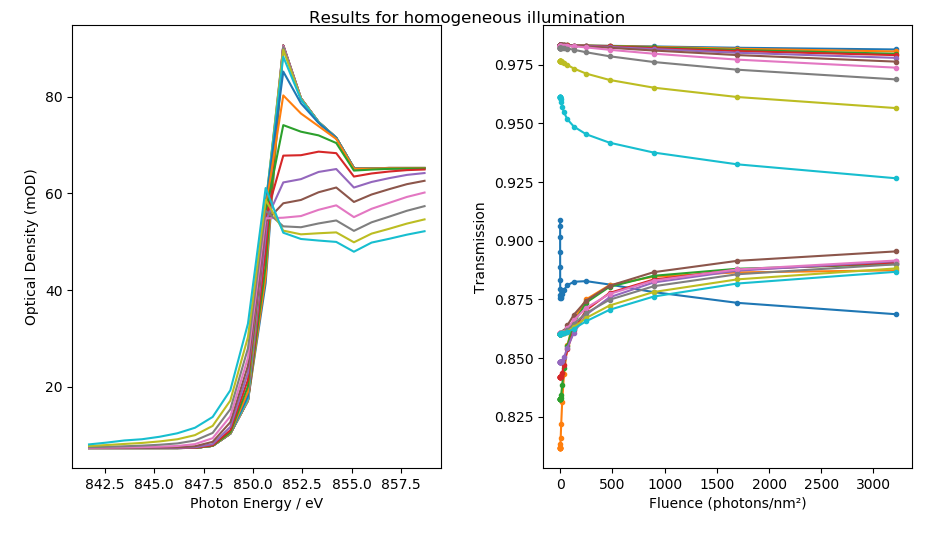

In [153]:
T = fl_dep_spectrum_T/fl_dep_spectrum_I

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
fig.suptitle('Results for homogeneous illumination')
ax1.plot(enax_abs,1e3*np.log10(1/T))
ax1.set_ylabel('Optical Density (mOD)')
ax1.set_xlabel('Photon Energy / eV')

plt.sca(ax2)
plt.plot(fluences_simulated*XNLdyn.photons_per_J(850), T[:,:].T, '.-')#, label ='For one z-stack'
plt.xlabel('Fluence (photons/nm²)')
plt.ylabel('Transmission')
#plt.xscale('log')
#plt.legend(loc = 'lower right')

plt.tight_layout()


<IPython.core.display.Javascript object>


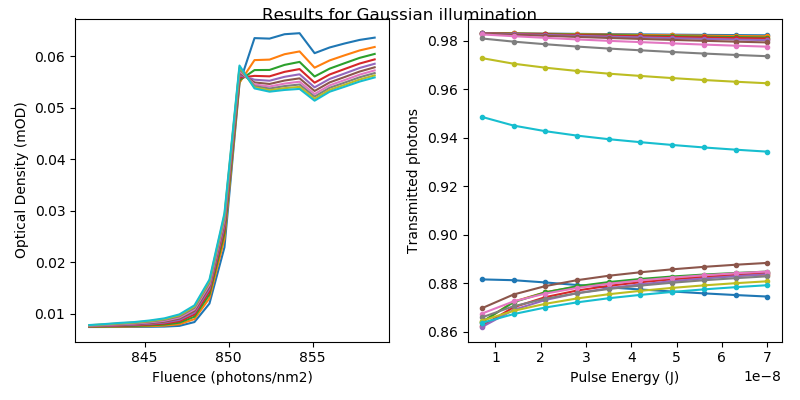

In [154]:
# These are the pulse energies for which we evaluate stuff
final_pulse_energies = np.linspace(1/N_pulse_energies, 1, N_pulse_energies)* pulse_energy_max

final_transmissions = np.zeros((N_points_E, N_pulse_energies))
final_incidence_check = np.zeros((N_points_E, N_pulse_energies))
for i_photen in range(N_points_E):

    for ipe, pulse_en in enumerate(final_pulse_energies*XNLdyn.photons_per_J(enax_abs[i_photen])):
        local_fluences, dA = XNLdyn.calculate_fluences(Nsteps_r, pulse_en, pulse_profile_sigma)
        
        
        local_transmitted = np.interp(local_fluences, fluences_simulated*XNLdyn.photons_per_J(enax_abs[i_photen]),
                                      fl_dep_spectrum_T[i_photen,:])# tr[:, 0]
        final_transmissions[i_photen,ipe] = np.sum(local_transmitted*dA)

        
        local_incidence_check = np.interp(local_fluences, fluences_simulated*XNLdyn.photons_per_J(enax_abs[i_photen]),
                                          fl_dep_spectrum_I[i_photen,:])

        final_incidence_check[i_photen,ipe] = np.sum(local_incidence_check*dA) # should result equal final_pulse_energies

        
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
fig.suptitle('Results for Gaussian illumination')

plt.sca(ax1)
plt.plot(enax_abs,np.log10(final_incidence_check/final_transmissions) )#, label ='For one z-stack'
plt.xlabel('Fluence (photons/nm2)')
plt.ylabel('Optical Density (mOD)')

plt.sca(ax2)
plt.plot(final_pulse_energies, (final_transmissions/final_incidence_check).T, '.-')

plt.xlabel('Pulse Energy (J)')
plt.ylabel('Transmitted photons')
#plt.legend(loc = 'lower left')
plt.tight_layout()

<IPython.core.display.Javascript object>


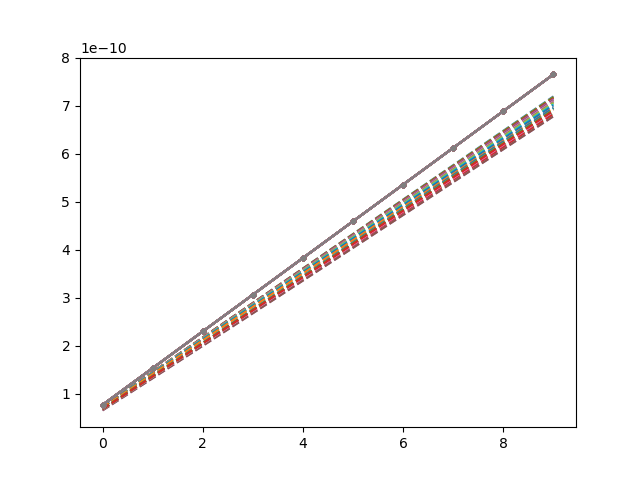

In [111]:
plt.figure()
plt.plot((1/XNLdyn.photons_per_J(enax_abs))*final_transmissions.T,'--')
plt.plot((1/XNLdyn.photons_per_J(enax_abs))*final_incidence_check.T,'.-')
#plt.plot(final_pulse_energies,'x')